In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
most_recent_date = most_recent_date.date()
print(most_recent_date)


2017-08-23


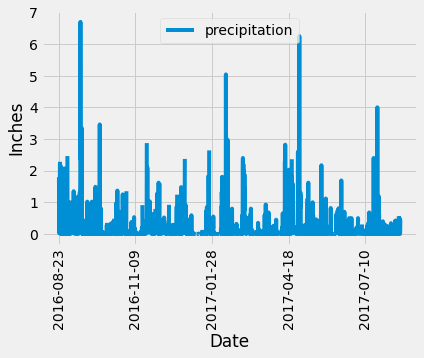

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
one_year_previous_date = most_recent_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).where(Measurement.date >= one_year_previous_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns = ['date', 'precipitation'])
precip_df.set_index('date', inplace = True)

# Sort the dataframe by date
precip_df = precip_df.sort_index(ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend()
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()
total_stations

9

In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
        .order_by(func.count(Measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == active_stations[0][0]).all()

# most_active_station

print(f'The most activate station is: {most_active_station[0][0]}')
print(f'The lowest temp for this station is: {most_active_station[0][1]}')
print(f'The highest temp for this station is: {most_active_station[0][2]}')
print(f'The average temp for this station is: {round(most_active_station[0][3], 2)}')

The most activate station is: USC00519281
The lowest temp for this station is: 54.0
The highest temp for this station is: 85.0
The average temp for this station is: 71.66


In [32]:
mas = most_active_station[0][0]
mas

'USC00519281'

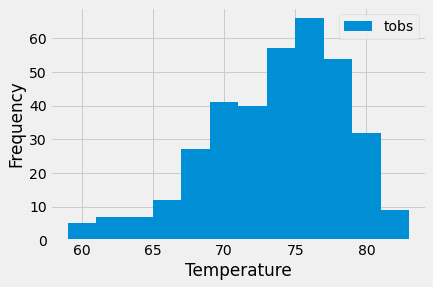

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find the most recent date for this station
most_recent_date_mas = session.query(Measurement.date).filter(Measurement.station == mas).order_by(Measurement.date.desc()).first()[0]
most_recent_date_mas = dt.datetime.strptime(most_recent_date_mas, '%Y-%m-%d')
most_recent_date_mas = most_recent_date_mas.date()


# Calculate the date one year from the last date in data set
one_year_previous_date_mas = most_recent_date_mas - dt.timedelta(days=365)

# # Perform a query to retrieve the data and temperature data
temps = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == 'USC00519281')\
        .where(Measurement.date >= one_year_previous_date_mas).all()

# # Save the query results as a Pandas DataFrame and set the index to the date column
temps_df = pd.DataFrame(temps, columns = ['date', 'tobs'])
temps_df.set_index('date', inplace = True)

# # Sort the dataframe by date
temps_df = temps_df.sort_index(ascending = True)

# Plot the results as a histogram
plt.hist(temps_df.tobs, bins = 12, label = 'tobs')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Close session

In [34]:
# Close Session
session.close()